In [1]:
import numpy as np

class LinearRegression():

    def __init__(self,lr=0.001,n_iterations=1000):

        self.lr = lr
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self,X,y):

        n_samples,n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):

            y_pred = np.dot(X , self.weights) + self.bias

            dw = 2 * (1/n_samples) * np.dot(X.T,(y_pred - y))
            db = 2 * (1/n_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db


    def predict(self,X):

        return np.dot(X,self.weights) + self.bias


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape,y_train.shape)

reg = LinearRegression(lr=0.1,n_iterations=2000)
reg.fit(X_train,y_train)

predictions = reg.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

print(y_test.shape,predictions.shape)
mse = mse(y_test, predictions)
print(mse)

(353, 10) (353,)
(89,) (89,)
2907.53671561867


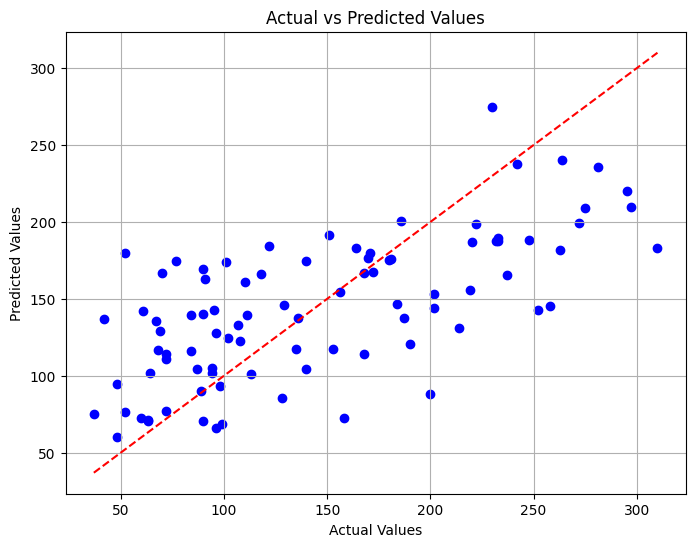

In [3]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()